# Analyze Slide-seqV2 data

Apply Squidpy for the anlaysis of Slide-seqV2 data. These data were obtained from [Stickels et al. 2020](https://pubmed.ncbi.nlm.nih.gov/33288904/) and a pre-processed subset of the data is provided in `anndata.AnnData` format.

## Import packages & data

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import squidpy as sq

print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.slideseqv2()
adata

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


squidpy==1.2.2


  0%|          | 0.00/251M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 41786 × 4000
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

Visualize cluster annotation in spatial context with `squidpy.pl.spatial_scatter()`.

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


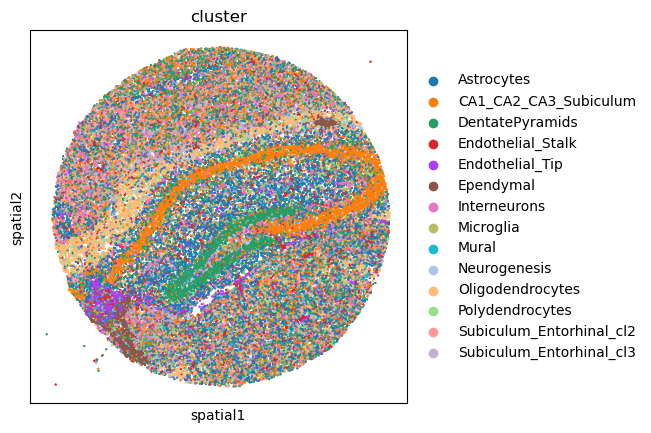

In [2]:
sq.pl.spatial_scatter(adata, color="cluster", size=1, shape=None)

## Neighborhood enrichment analysis

Compute a neighborhood enrichment score with `squidpy.gr.nhood_enrichment()`. This is an enrichment score on spatial proximity of clusters. if spots belonging to two different clusters are often close to each other, then they will have a high score and can be defined as being _enriched_. On the other hand, if they are far apart, the score will be low and they can be defined as _depleted_. This score is based on a permutation-based test, and you can set the number of permutations with the `n_perms` argument (default is 1000).

Compute a connectivity matrix with `squidpy.gr.spatial_neighbors()` and viusalize the results with `squidpy.pl.nhood_enrichment()`. Add a dendrogram to the heatmap computed with linkage method _ward_.

  0%|          | 0/1000 [00:00<?, ?/s]

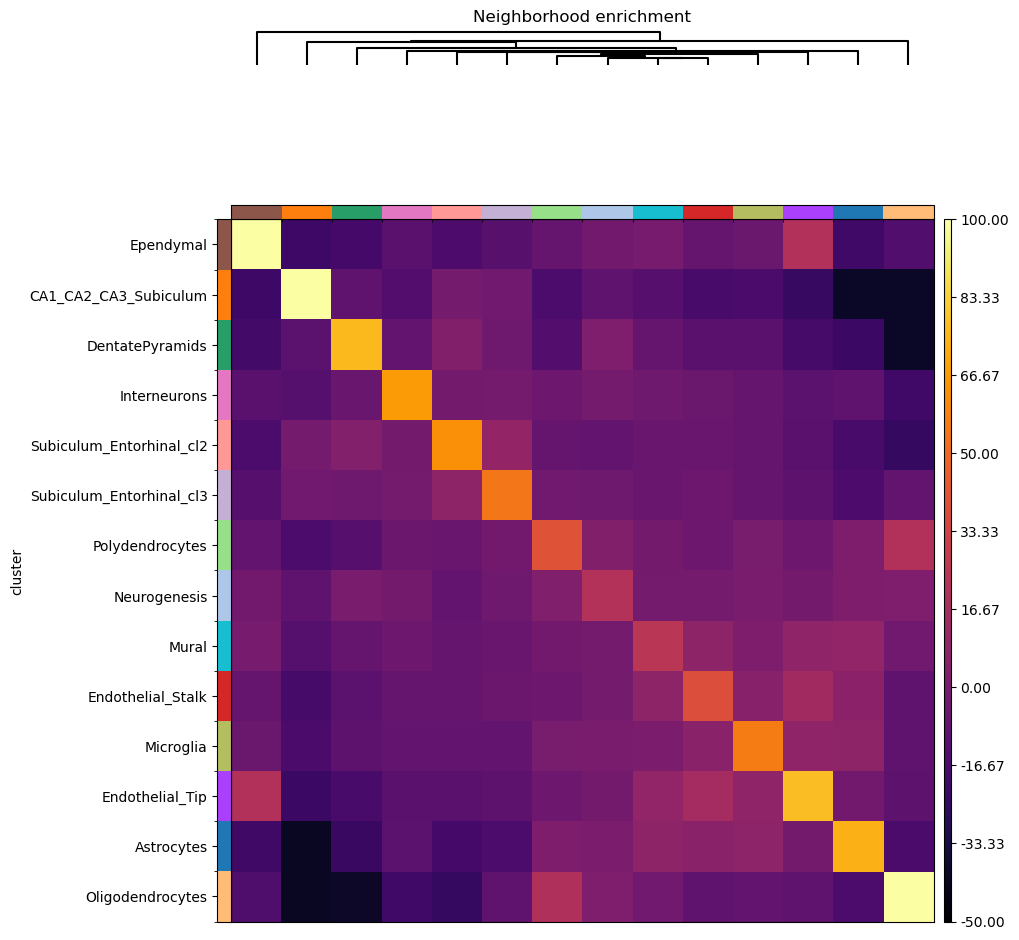

In [5]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cluster")
sq.pl.nhood_enrichment(
    adata, cluster_key="cluster", method="single", cmap="inferno", vmin=-50, vmax=100
)

There seems to be an enrichment between the _Endothelial_Tip_ and _Ependymal_ cells. Another putative enrichment is between the _Oligodendrocytes_ and _Polydendrocytes_ cells. Visualize the spatial organization of such clusters with `squidpy.pl.spatial_scatter()` again.

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


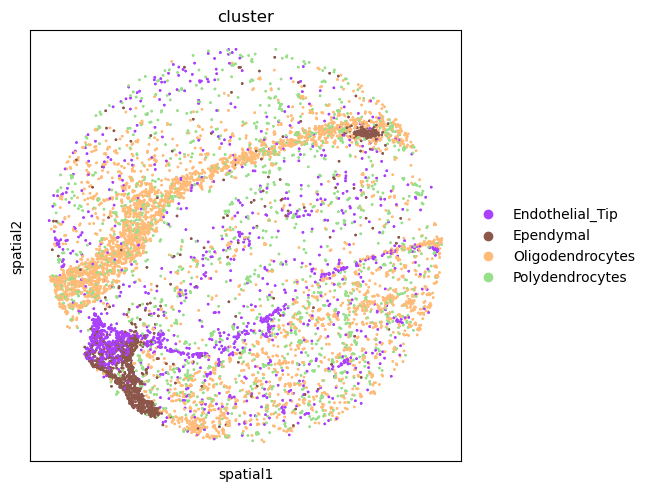

In [6]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="cluster",
    groups=["Endothelial_Tip", "Ependymal", "Oligodendrocytes", "Polydendrocytes"],
    size=3,
)

## Ripley's statistics

Ripley's statistics allow analyst to evaluate whether a discerte annotation (e.g. cell-type) appears to be clustered, dispersed, or randomly distributed on the area of interest. In Squidpy, implement three closely realated Ripley's statistics that can be computed with `squid.gr.ripley()`. Here, Ripley's L statstic is a variance-stabilized version of the Ripley's K statistic, visualized with `squidpy.pl.ripley()`.

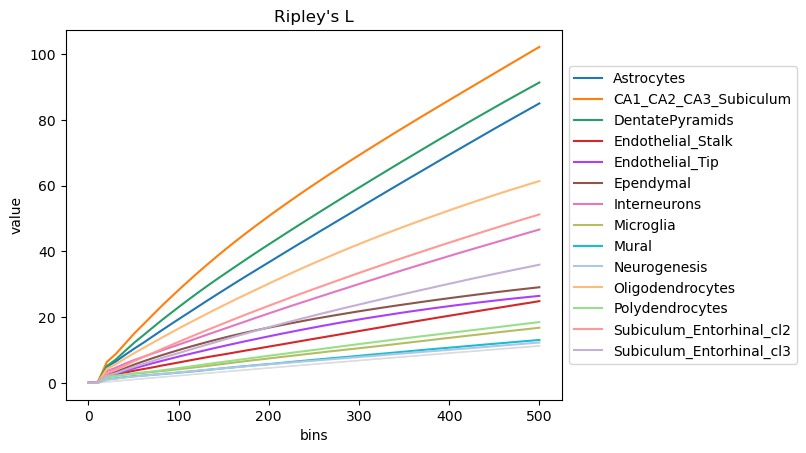

In [7]:
mode = "L"
sq.gr.ripley(adata, cluster_key="cluster", mode=mode, max_dist=500)
sq.pl.ripley(adata, cluster_key="cluster", mode=mode)

The plot highlights how some cell-types have a more clustered pattern, like _Astrocytes_ anc _CA1_CA2_CA3_Subiculum_ cells, whereas other have a more dispersed pattern, like _Mural_ cells. To confirm, selectively visualize again their spatial organization.

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


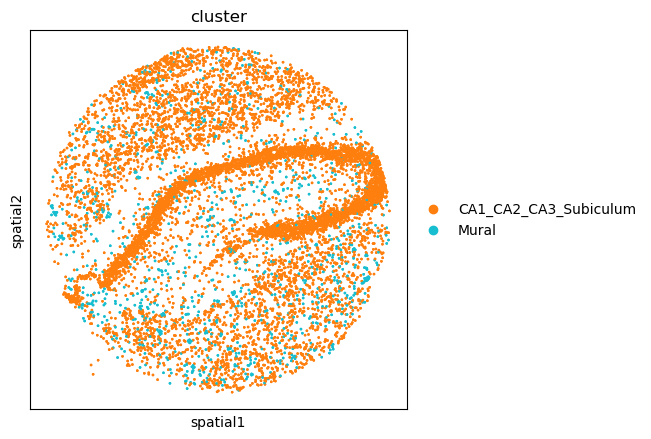

In [9]:
sq.pl.spatial_scatter(
    adata,
    color="cluster",
    groups=["Mural", "CA1_CA2_CA3_Subiculum"],
    size=3,
    shape=None,
)

In [10]:
sq.gr.ligrec(
    adata,
    n_perms=100,
    cluster_key="cluster",
    clusters=["Polydendrocytes", "Oligodendrocytes"],
)
sq.pl.ligrec(
    adata,
    cluster_key="cluster",
    source_groups="Oligodendrocytes",
    target_groups=["Polydendrocytes"],
    pvalue_threshold=0.05,
    swap_axes=True,
)

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/squidpy/gr/_ligrec.py:391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clusters"] = data["clusters"].cat.remove_unused_categories()
/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/squidpy/gr/_ligrec.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clusters"] = cat.rename_categories(cluster_mapper)


  0%|          | 0/100 [00:00<?, ?permutation/s]

ValueError: After removing rows with only NaN interactions, none remain.